In [9]:
%cd ..


/Users/eliaweiss/ai/segmentation/MobileSAM


In [ ]:
from typing import List
from lineVision.lineCv.contours.LineCv_ContourCell import LineCv_ContourCell

def applyLineSegment(mask, segmentedLine: List['LineCv_ContourCell'], color=255):
    for i, ls in enumerate(segmentedLine):
        left, bottom, right, top = ls.boundingBox

        for y in range(bottom, top):
            for x in range(left, right):
                
                if ls.patch is not None and ls.patch[y-bottom, x-left] > 0:
                    mask[y, x] = color

In [10]:
import cv2
import numpy as np
from tblDetect.TableDetect import TableDetect
from tblDetect.MobileSamBoxes import MobileSamBoxes
import matplotlib.pyplot as plt
from PIL import Image
from notebooks.Utils import plot_results, plot_annotations, \
    plot_rotatedResult,outputs_to_objects, \
        calculate_angle

/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with tinyvit.tiny_vit.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with tinyvit.tiny_vit.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with tinyvit.tiny_vit.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: U

In [11]:
# file_path = "./app/assets/picture1.jpg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/sihach/attachments/img/20231025012642_001.jpg"
file_path = "/Users/eliaweiss/Documents/doc2txt/sihach/need fix/4e7d4235deff4ee2b72d886e12ad0bcf.jpg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/invoices 2/expense (6).jpeg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/lineCv/1/12.png"

img = Image.open(file_path)
max_size = (1500, 1500)  # Example maximum size

# Resize the image
img.thumbnail(max_size)

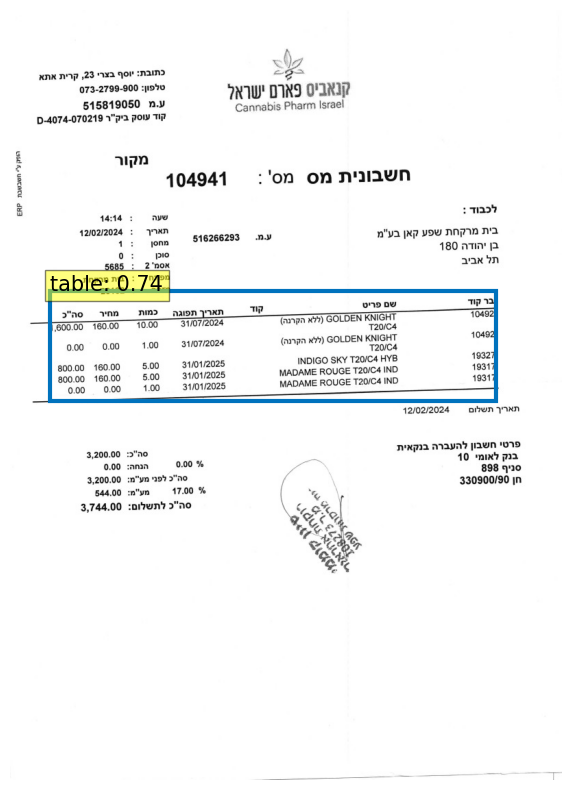

In [12]:
tblDec = TableDetect()
probas, boxes = tblDec.detectTables(img)
plot_results(tblDec.model, img, probas, boxes)

In [16]:
box = np.int0(boxes[0])
box

/var/folders/yb/0c4mt25s0cd6btj71b9f7qfc0000gn/T/ipykernel_49715/2645399230.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(boxes[0])


array([ 58, 410, 708, 570])

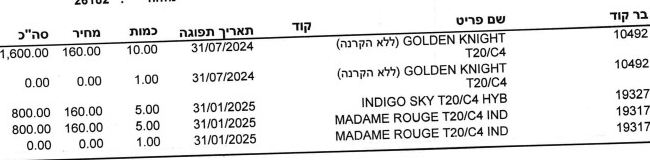

In [18]:
tbl_patch_pil = img.crop(box)
tbl_patch_pil

In [19]:
from lineVision.lineCv.processor.Cv_Line_Processor import Cv_Line_Processor
from lineVision.DocumentBbZv import DocumentBBZv
import cv2
tbl_patch = np.array(tbl_patch_pil)
documentBBZv = DocumentBBZv(tbl_patch)
cvProcessor = Cv_Line_Processor(
    documentBBZv=documentBBZv,
    )   
cvProcessor.process() 

self.hog_shape (160, 650)
self.main_shape (160, 650)
final lines: 31


In [ ]:
lines = cvProcessor.finalLine_Processor.getLines()
lines.sort(key=lambda l: -len(l))
for line in lines:
    print(len(line))

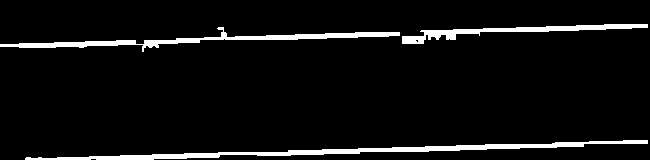

In [30]:
mask = np.zeros(cvProcessor.imgZv.hog_shape, np.uint8)
for line in lines[:5]:
    applyLineSegment(mask, line, color=(255))
    
Image.fromarray(mask)    